In [1]:
import torch
# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f"CUDA available: {cuda_available}")

if cuda_available:
    # Get the number of GPUs available
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}")

    # Get the name of each GPU
    for i in range(num_gpus):
        gpu_name = torch.cuda.get_device_name(i)
        print(f"GPU {i}: {gpu_name}")

    # Get the current GPU memory usage
    for i in range(num_gpus):
        gpu_memory_allocated = torch.cuda.memory_allocated(i)
        gpu_memory_reserved = torch.cuda.memory_reserved(i)
        print(f"GPU {i} memory allocated: {gpu_memory_allocated / (1024 ** 3):.2f} GB")
        print(f"GPU {i} memory reserved: {gpu_memory_reserved / (1024 ** 3):.2f} GB")
else:
    print("CUDA is not available.")

CUDA available: True
Number of GPUs available: 1
GPU 0: NVIDIA GeForce RTX 4060 Laptop GPU
GPU 0 memory allocated: 0.00 GB
GPU 0 memory reserved: 0.00 GB


In [2]:
import sys
import os
import pickle
import logging
import numba
import matplotlib
import matplotlib.pyplot as plt
logging.getLogger('matplotlib.font_manager').disabled = True
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.WARNING)

matplotlib_logger = logging.getLogger('matplotlib')
matplotlib_logger.setLevel(logging.WARNING)

# Add the src directory to sys.path
src_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(src_path)

from src.IndependentSteps import Pycromanager2NativeDataType, FFF2NativeDataType, NativeDataType

from src.SequentialSteps import BIGFISH_SpotDetection, SimpleCellposeSegmentaion, CellProperties, DilationedCytoMask ,\
                                    DisplaySequentialParams, IlluminationCorrection, Calculate_BIGFISH_Threshold, rescale_images,\
                                    Automatic_BIGFISH_Threshold

from src.FinalizationSteps import Save_Outputs, Save_Images, Save_Parameters, Save_Masks, return_to_NAS, remove_local_data_but_keep_h5

from src.Parameters import Parameters, Experiment, Settings, ScopeClass, DataContainer

from src.Displays import Display

from src.GUI import GUI, StepGUI

from src.Pipeline import Pipeline

INFO:numexpr.utils:Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:numexpr.utils:NumExpr defaulting to 16 threads.
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7


In [3]:
scope = ScopeClass() 
data = DataContainer(clear_after_error=False)
settings = Settings(name='demo')
experiment = Experiment()

In [4]:
# you can change the parameters
experiment.initial_data_location = ['smFISH_images/Eric_smFISH_images/20220225/DUSP1_Dex_0min_20220224']
                                    # 'smFISH_images/Eric_smFISH_images/20220225/DUSP1_Dex_10min_20220224']

# data.local_dataset_location = [r'C:\Users\formanj\GitHub\FISH_Processing\Demos\DUSP1_Dex_10min_20220224', 
#                                  r'C:\Users\formanj\GitHub\FISH_Processing\Demos\DUSP1_Dex_0min_20220224']
experiment.FISHChannel = 0
experiment.nucChannel = 2
experiment.cytoChannel = 1
experiment.voxel_size_z = 500

settings.num_chunks_to_run = 1 # this is the limit to how many chunks you want to run and it will stop after that
# settings.psuedoCyto = 1
settings.sigma_dict = {0: 50, 1: 100, 2: 100}

scope.spot_yx = 130
scope.spot_z = 360
scope.voxel_size_yx = 100

Parameters.get_parameters()

{'voxel_size_yx': 100,
 'spot_z': 360,
 'spot_yx': 130,
 'microscope_saving_format': 'pycromanager',
 'local_dataset_location': None,
 'h5_file': None,
 'total_num_chunks': None,
 'images': None,
 'masks': None,
 'temp': <TemporaryDirectory 'c:\\Users\\Jack\\Documents\\GitHub\\AngelFISH\\dev\\tmpjs4eekcs'>,
 'clear_after_error': False,
 'name': 'demo',
 'return_data_to_NAS': True,
 'NUMBER_OF_CORES': 4,
 'save_files': True,
 'num_chunks_to_run': 1,
 'download_data_from_NAS': True,
 'connection_config_location': 'c:\\Users\\Jack\\Documents\\GitHub\\AngelFISH\\config_nas.yml',
 'share_name': 'share',
 'display_plots': True,
 'load_in_mask': False,
 'sigma_dict': {0: 50, 1: 100, 2: 100},
 'initial_data_location': ['smFISH_images/Eric_smFISH_images/20220225/DUSP1_Dex_0min_20220224'],
 'index_dict': None,
 'nucChannel': 2,
 'cytoChannel': 1,
 'FISHChannel': 0,
 'voxel_size_z': 500,
 'independent_params': None,
 'kwargs': None,
 'timestep_s': None}

In [5]:
Parameters.validate()

None


In [6]:
settings.load_in_mask = True
NativeDataType().run()

Overwriting local_dataset_location in DataContainer
Overwriting h5_file in DataContainer
Overwriting total_num_chunks in DataContainer
Overwriting independent_params in Experiment


{'local_dataset_location': ['c:\\Users\\Jack\\Documents\\GitHub\\AngelFISH\\dataBases\\DUSP1_Dex_0min_20220224\\DUSP1_Dex_0min_20220224.h5'],
 'h5_file': [<HDF5 file "DUSP1_Dex_0min_20220224.h5" (mode r)>],
 'total_num_chunks': 30,
 'images': dask.array<rechunk-merge, shape=(30, 1, 3, 27, 936, 640), dtype=float32, chunksize=(1, 1, 3, 27, 936, 640), chunktype=numpy.ndarray>,
 'masks': dask.array<rechunk-merge, shape=(30, 1, 3, 27, 936, 640), dtype=int8, chunksize=(1, 1, 3, 27, 936, 640), chunktype=numpy.ndarray>,
 'independent_params': {0: {'NAS_location': 'smFISH_images/Eric_smFISH_images/20220225/DUSP1_Dex_0min_20220224\\DUSP1_Dex_0min_20220224.h5'},
  1: {'NAS_location': 'smFISH_images/Eric_smFISH_images/20220225/DUSP1_Dex_0min_20220224\\DUSP1_Dex_0min_20220224.h5'},
  2: {'NAS_location': 'smFISH_images/Eric_smFISH_images/20220225/DUSP1_Dex_0min_20220224\\DUSP1_Dex_0min_20220224.h5'},
  3: {'NAS_location': 'smFISH_images/Eric_smFISH_images/20220225/DUSP1_Dex_0min_20220224\\DUSP1_Dex_

In [7]:
# this will load in your data
print(data)

DataContainer:
local_dataset_location: ['c:\\Users\\Jack\\Documents\\GitHub\\AngelFISH\\dataBases\\DUSP1_Dex_0min_20220224\\DUSP1_Dex_0min_20220224.h5'] 
h5_file: [<HDF5 file "DUSP1_Dex_0min_20220224.h5" (mode r)>] 
total_num_chunks: 30 
images: dask.array<from-npy-stack, shape=(30, 1, 3, 27, 936, 640), dtype=float32, chunksize=(1, 1, 3, 27, 936, 640), chunktype=numpy.ndarray> 
masks: dask.array<from-npy-stack, shape=(30, 1, 3, 27, 936, 640), dtype=int8, chunksize=(1, 1, 3, 27, 936, 640), chunktype=numpy.ndarray> 
temp: <TemporaryDirectory 'c:\\Users\\Jack\\Documents\\GitHub\\AngelFISH\\dev\\tmpjs4eekcs'> 
clear_after_error: False 
_images_modified: True 
_masks_modified: True 
position_indexs: [30] 



In [8]:
# IlluminationCorrection().run()

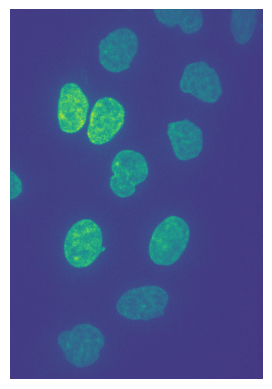

array([[549., 610., 595., ..., 599., 651., 626.],
       [554., 579., 554., ..., 690., 646., 579.],
       [702., 604., 561., ..., 633., 652., 582.],
       ...,
       [642., 637., 541., ..., 531., 747., 503.],
       [543., 638., 559., ..., 632., 691., 525.],
       [557., 705., 607., ..., 663., 542., 621.]], dtype=float32)

In [9]:
Display().displayImage_maxProject(channel=2)

In [10]:
# if you would like to remove the original data from disk
remove_local_data_but_keep_h5().run()

In [11]:

# settings.cellpose_min_size = 500
# settings.cellpose_diameter = [180, 90]
# settings.cellpose_pretrained_model = ["GAPDH_cyto", 'DAPI_nuclei'] 

# SimpleCellposeSegmentaion().run()

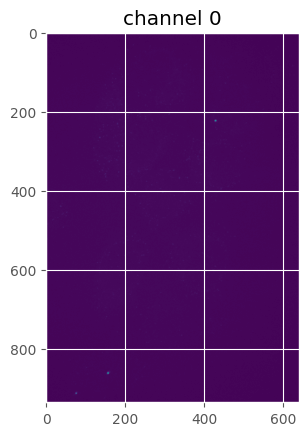

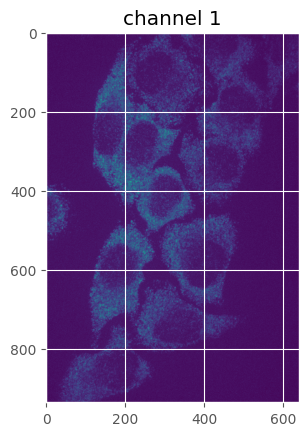

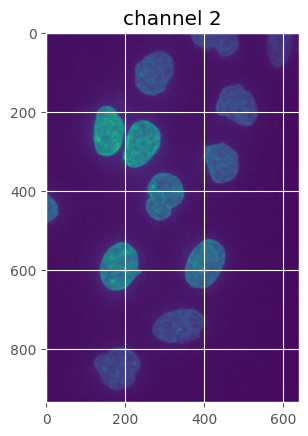

{'images': array([[[[[[ 6.,  4.,  3., ...,  3.,  3.,  2.],
            [ 3.,  3.,  5., ...,  2.,  2.,  2.],
            [ 4.,  3.,  5., ...,  4.,  2.,  2.],
            ...,
            [ 3.,  2.,  3., ...,  2.,  3.,  1.],
            [ 2.,  3.,  3., ...,  3.,  2.,  3.],
            [ 4.,  2.,  4., ...,  4.,  2.,  3.]],
 
           [[ 5.,  3.,  2., ...,  3.,  3.,  3.],
            [ 4.,  4.,  2., ...,  4.,  3.,  2.],
            [ 3.,  3.,  2., ...,  3.,  2.,  3.],
            ...,
            [ 6.,  3.,  5., ...,  3.,  4.,  3.],
            [ 3.,  3.,  4., ...,  3.,  3.,  2.],
            [ 3.,  5.,  2., ...,  2.,  3.,  3.]],
 
           [[ 3.,  3.,  4., ...,  2.,  3.,  3.],
            [ 2.,  3.,  3., ...,  3.,  4.,  2.],
            [ 4.,  4.,  4., ...,  2.,  3.,  3.],
            ...,
            [ 3.,  3.,  4., ...,  2.,  3.,  3.],
            [ 3.,  3.,  3., ...,  4.,  2.,  2.],
            [ 3.,  4.,  6., ...,  2.,  3.,  3.]],
 
           ...,
 
           [[ 2.,  4.,  3., ..

In [12]:
rescale_images().run()

In [ ]:
# settings.MAX_NUM_IMAGES_TO_AUTOMATICALLY_CALCULATE_THRESHOLD = 50
Automatic_BIGFISH_Threshold().run()

Channel:  0
Threshold:  17.18181818181818

Overwriting bigfish_threshold in DataContainer


{'bigfish_threshold': [17.18181818181818]}

In [27]:
data.bigfish_threshold = [17.18181818181818]
print(data)

DataContainer:
local_dataset_location: ['c:\\Users\\Jack\\Documents\\GitHub\\AngelFISH\\dataBases\\DUSP1_Dex_0min_20220224\\DUSP1_Dex_0min_20220224.h5'] 
h5_file: [<HDF5 file "DUSP1_Dex_0min_20220224.h5" (mode r)>] 
total_num_chunks: 30 
images: dask.array<from-npy-stack, shape=(30, 1, 3, 27, 936, 640), dtype=float32, chunksize=(1, 1, 3, 27, 936, 640), chunktype=numpy.ndarray> 
masks: dask.array<from-npy-stack, shape=(30, 1, 3, 27, 936, 640), dtype=int8, chunksize=(1, 1, 3, 27, 936, 640), chunktype=numpy.ndarray> 
temp: <TemporaryDirectory 'c:\\Users\\Jack\\Documents\\GitHub\\AngelFISH\\dev\\tmpjs4eekcs'> 
clear_after_error: False 
_images_modified: True 
_masks_modified: True 
position_indexs: [30] 
bigfish_threshold: [17.18181818181818] 
cellresults:    cell_id  cell_area  nuc_area  nb_rna  nb_rna_in_nuc  nb_rna_out_nuc  \
0        2      27471      9143      40              5              35   
1        3      22756      8380      43              2              41   
2        4     

++++++++++++++++++++++++++++
Running :  BIGFISH_SpotDetection
++++++++++++++++++++++++++++

 ###################### 
FOV:0 TIMEPOINT: 0
 ###################### 


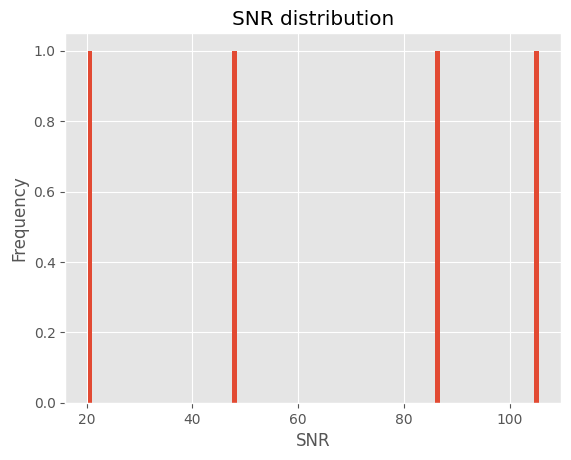

median SNR: 67.13862670417147
mean SNR: 64.99158456951443


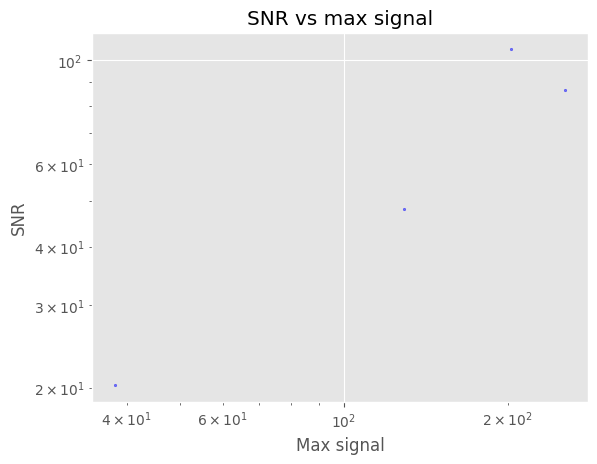

SNR threshold: None
detected canidate spots
 shape: (4, 3)
 threshold: 17.18181818181818
detected spots after decomposition
 shape: (6, 3)
detected spots after clustering
 shape: (6, 4)
detected clusters
 shape: (0, 5)


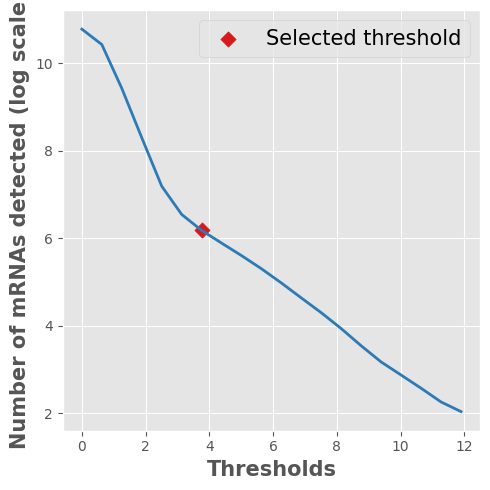

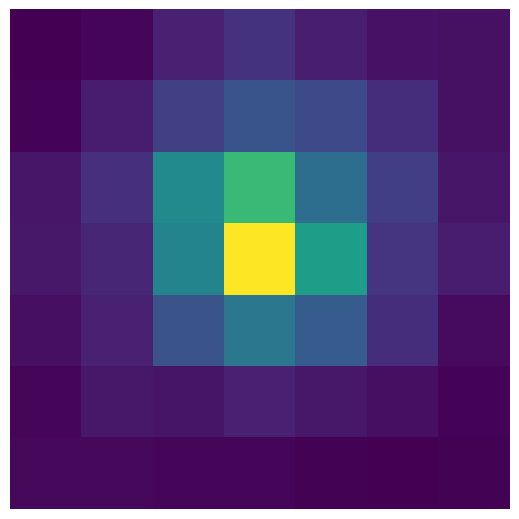

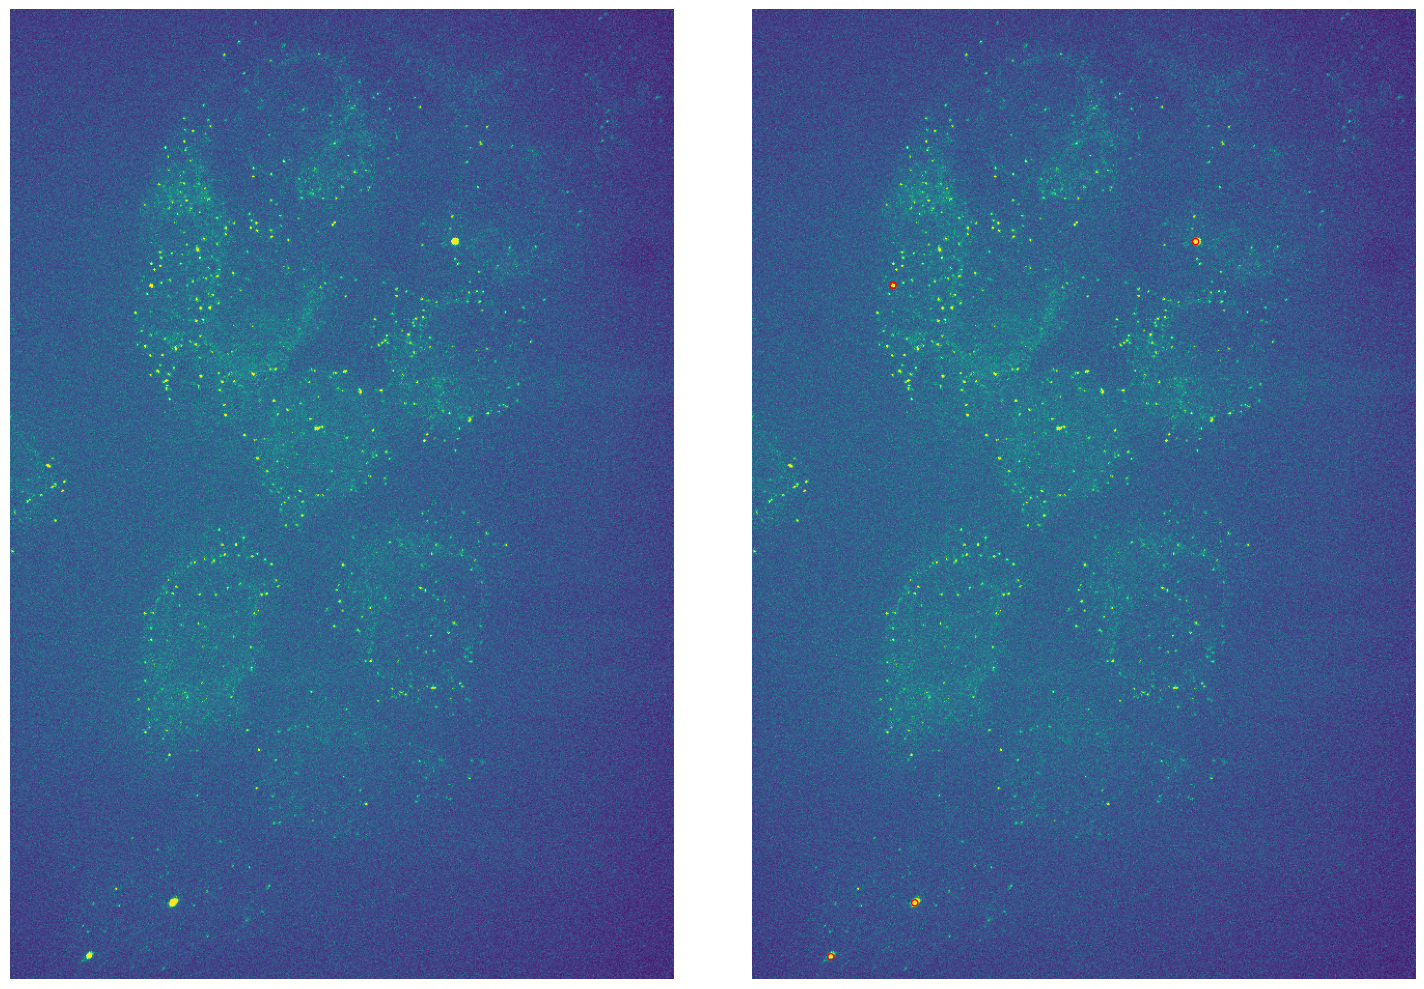

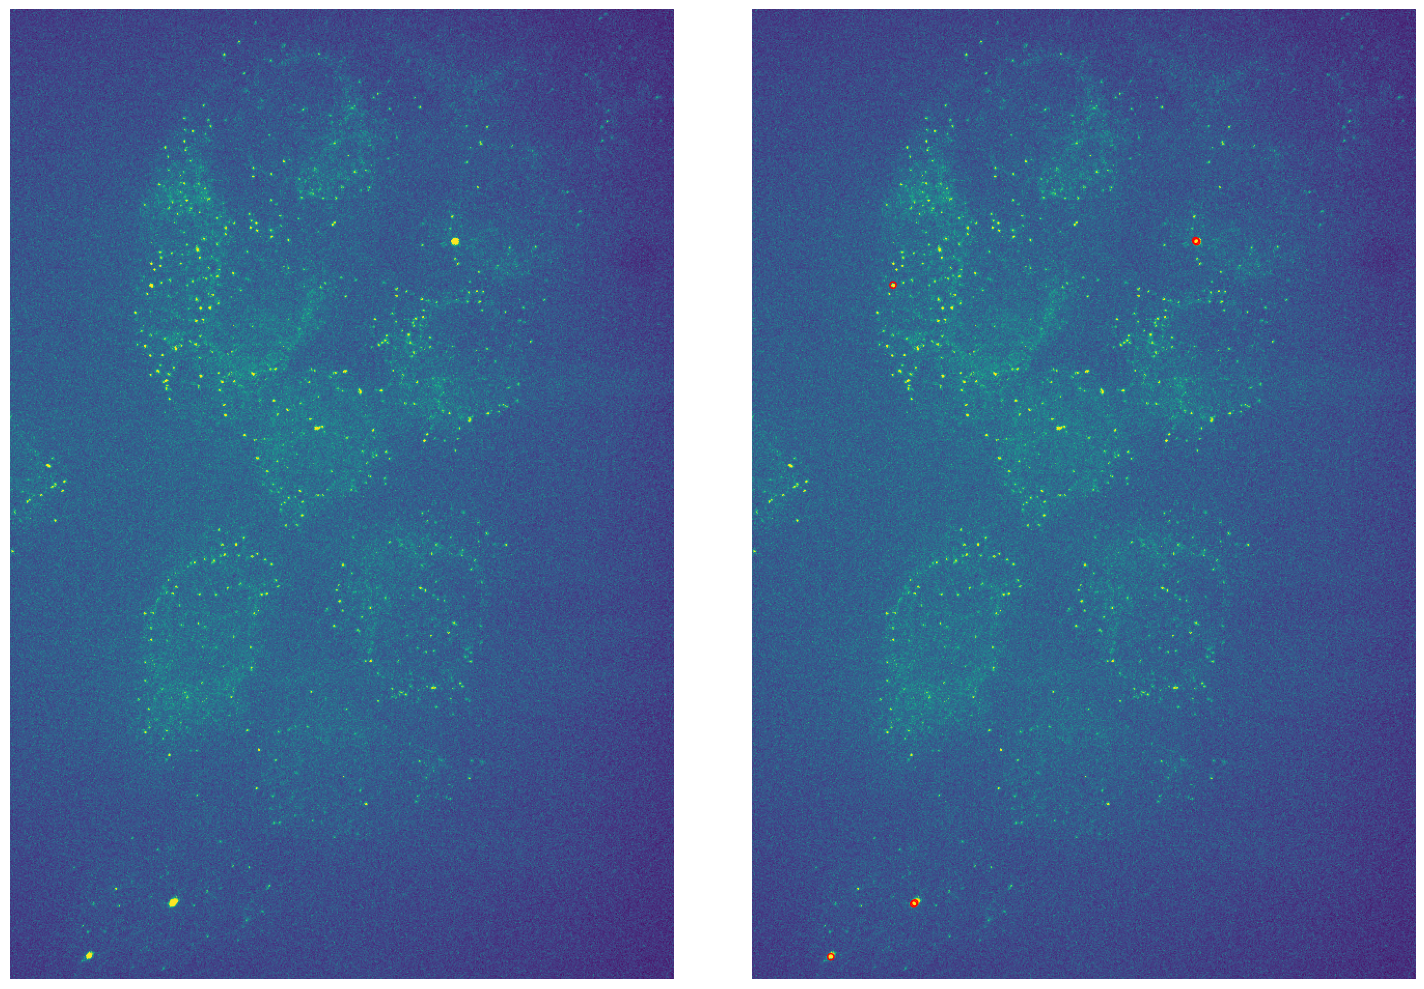

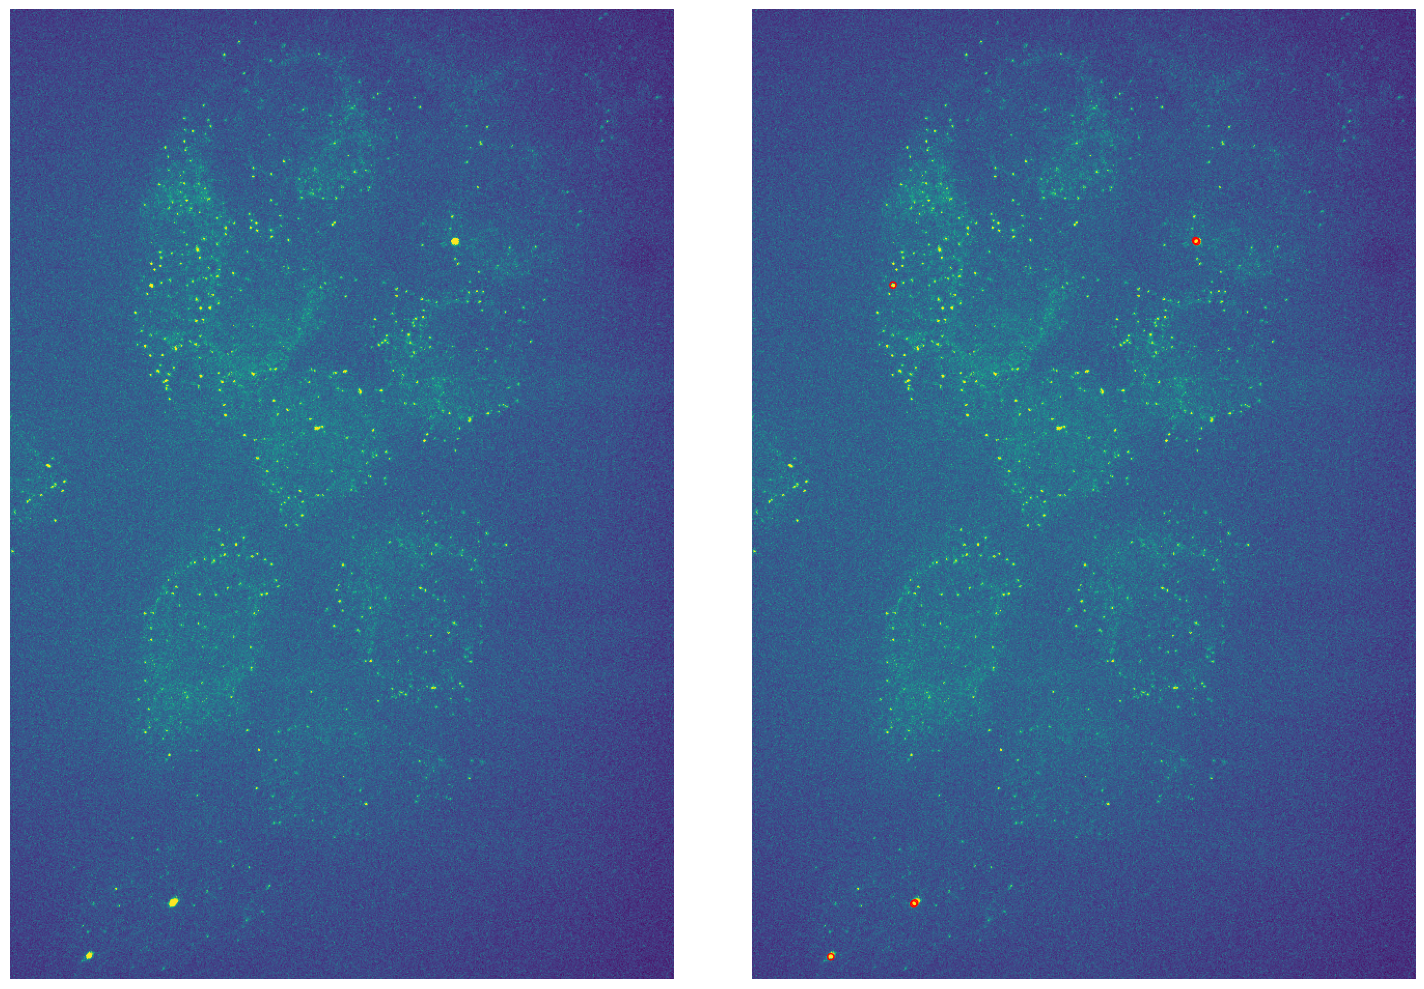

detected spots (without transcription sites)
 shape: (6, 4)
 dtype: int64
detected spots (inside nuclei)
 shape: (3, 4)
 dtype: int64 

detected spots (outside nuclei)
 shape: (3, 4)
 dtype: int64
number of cells identified: 9
cell 0
 number of rna 0
 number of foci 0
 number of transcription sites 0


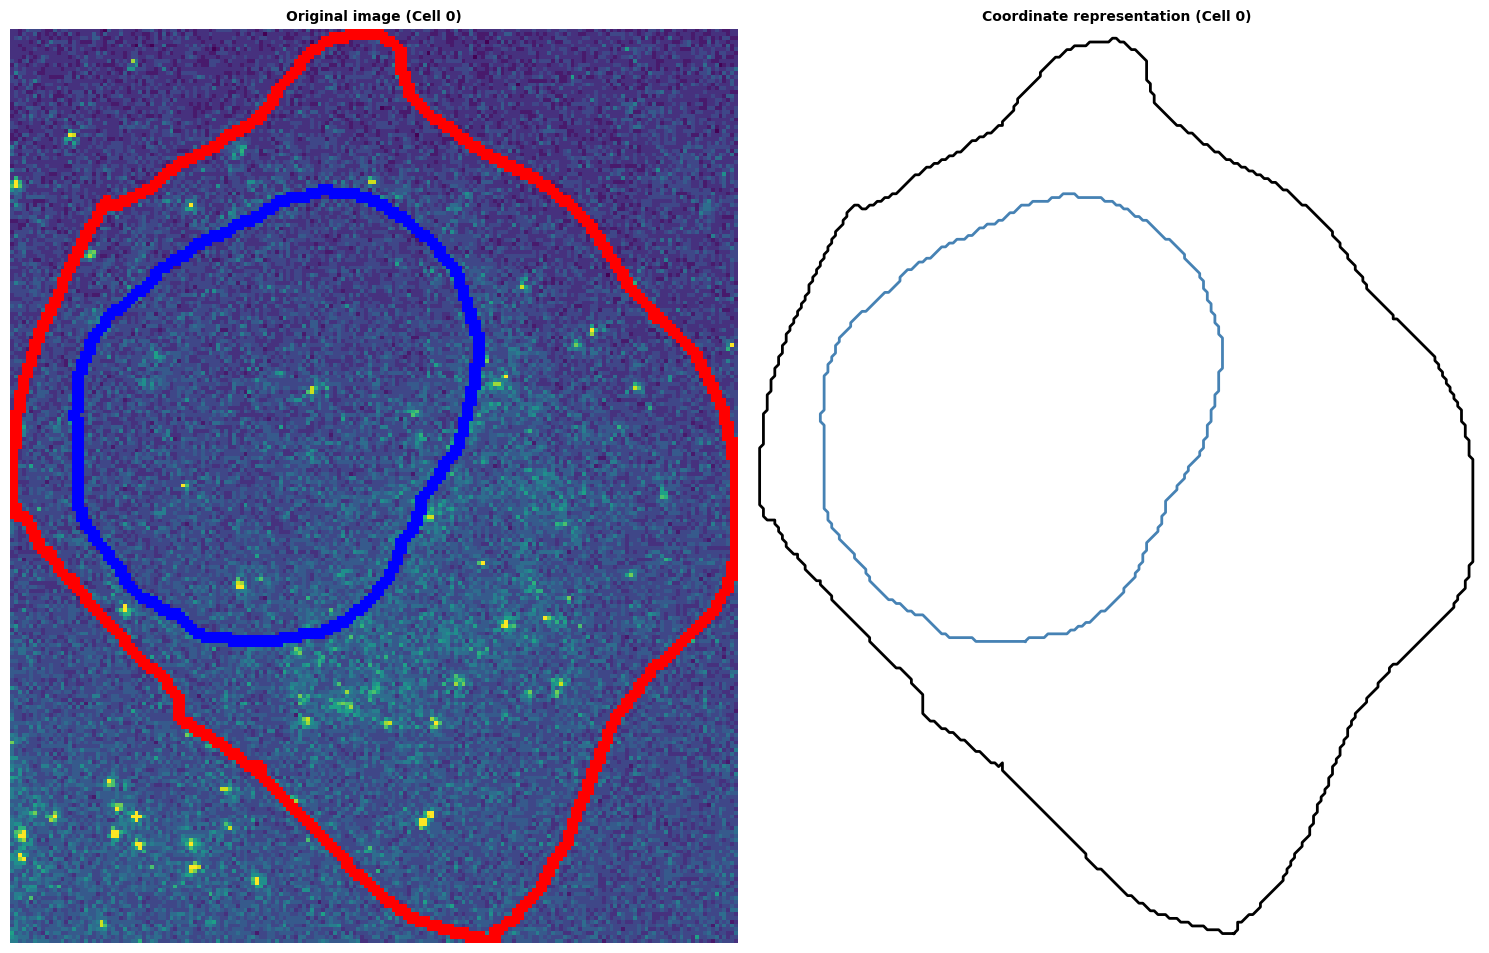

cell 1
 number of rna 2
 number of foci 0
 number of transcription sites 0


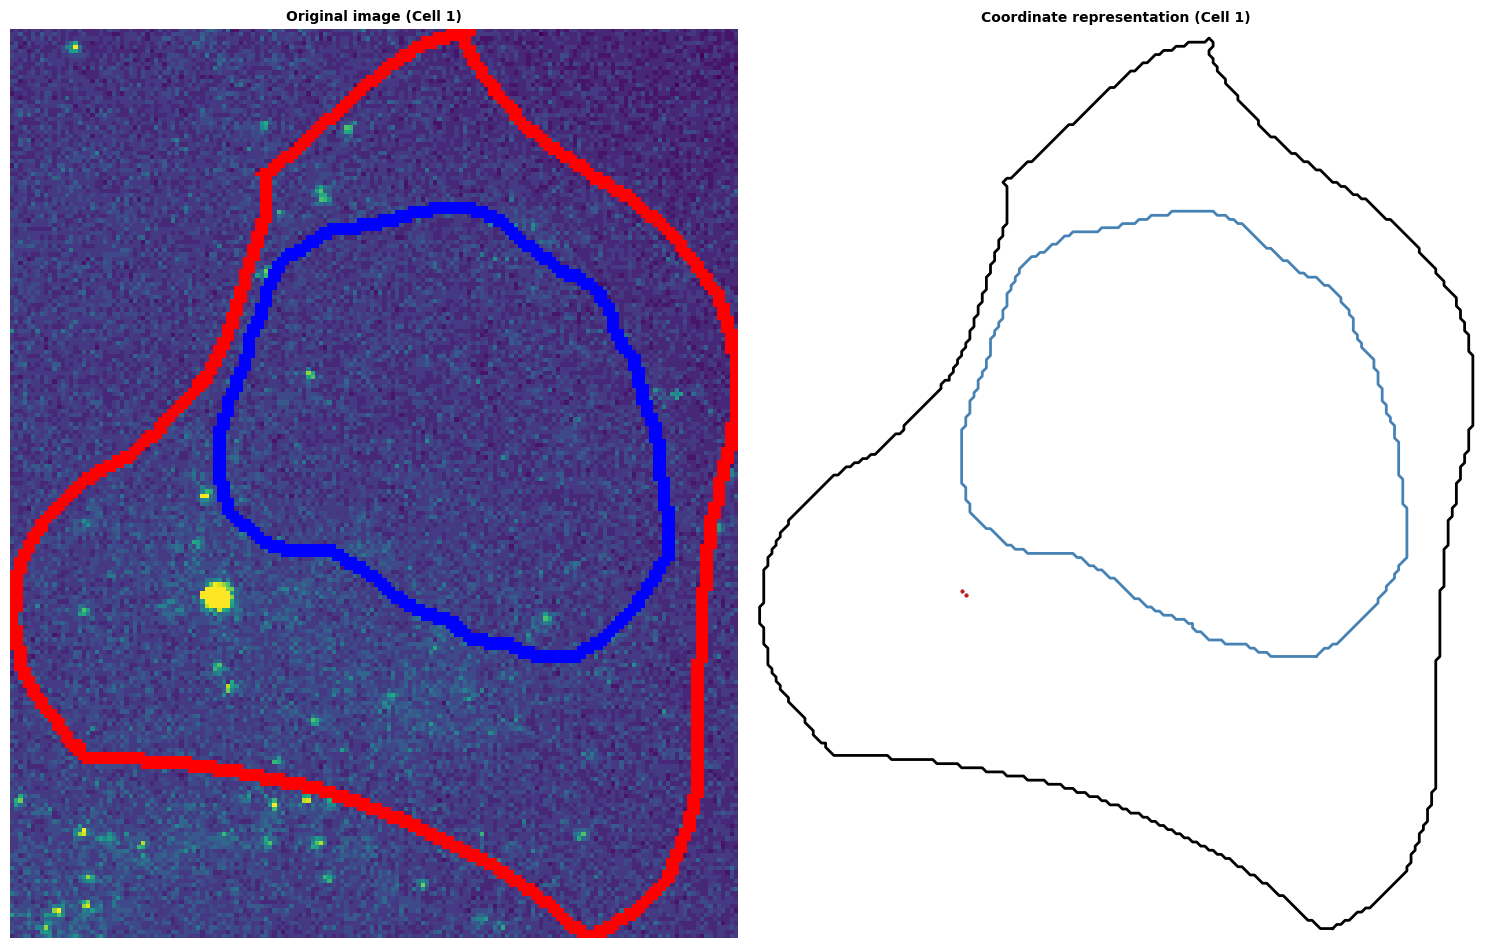

cell 2
 number of rna 1
 number of foci 0
 number of transcription sites 0


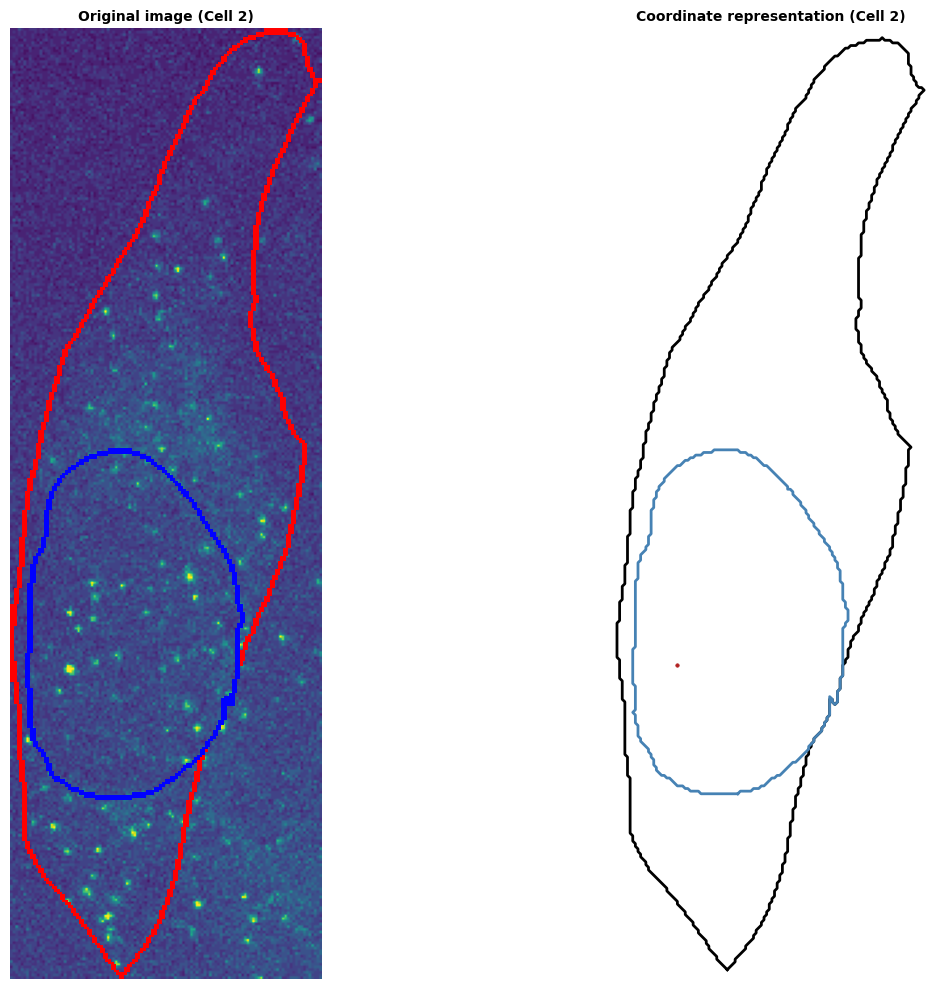

cell 3
 number of rna 0
 number of foci 0
 number of transcription sites 0


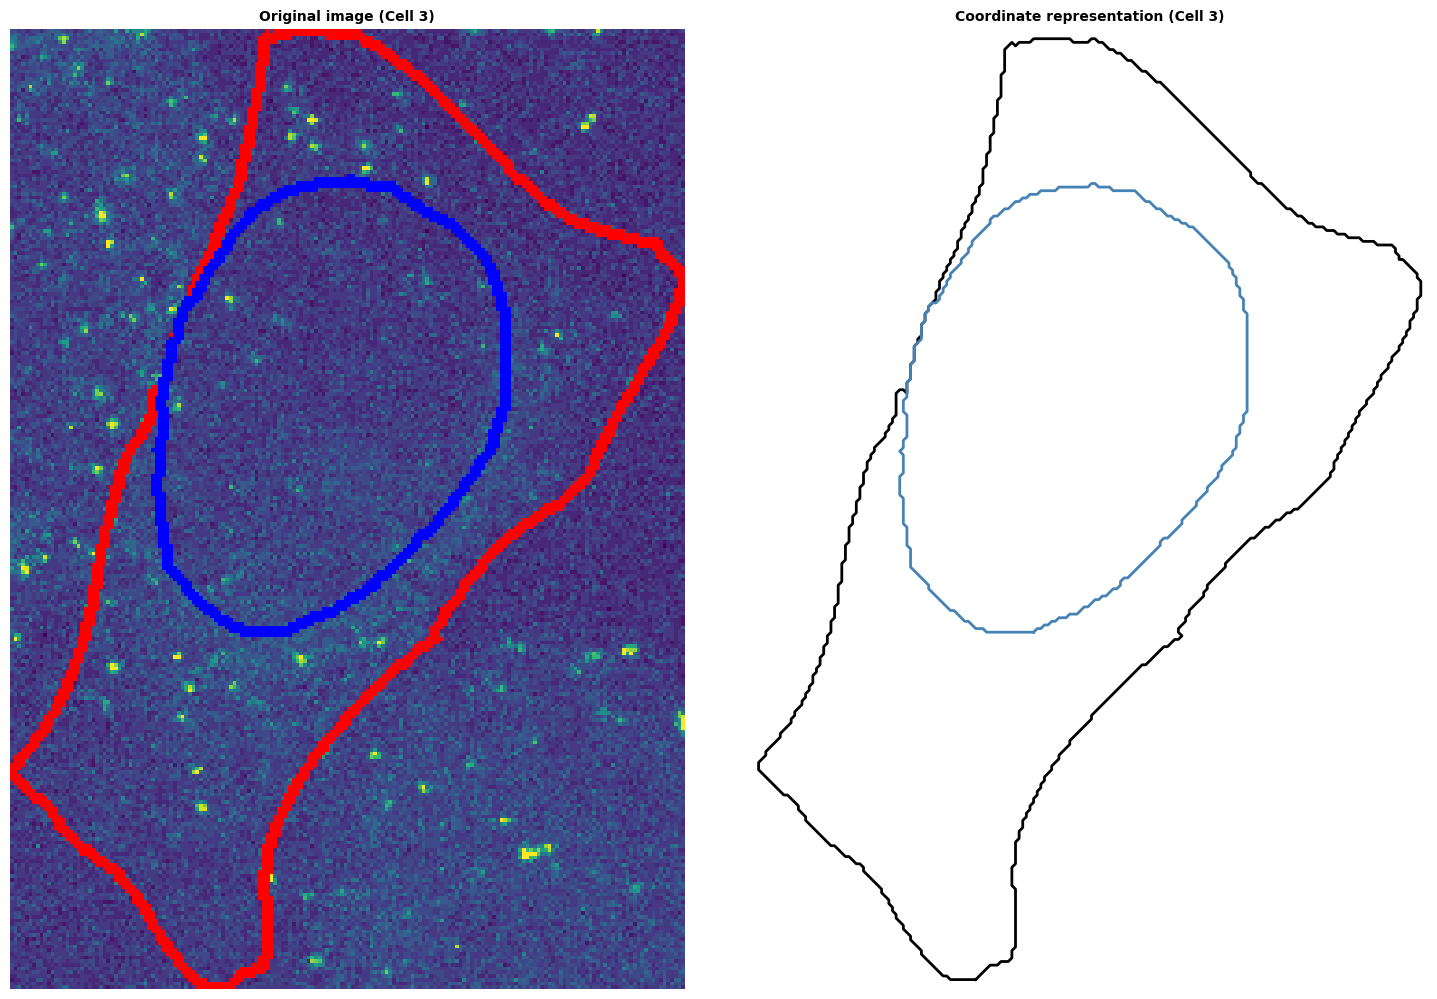

cell 4
 number of rna 0
 number of foci 0
 number of transcription sites 0


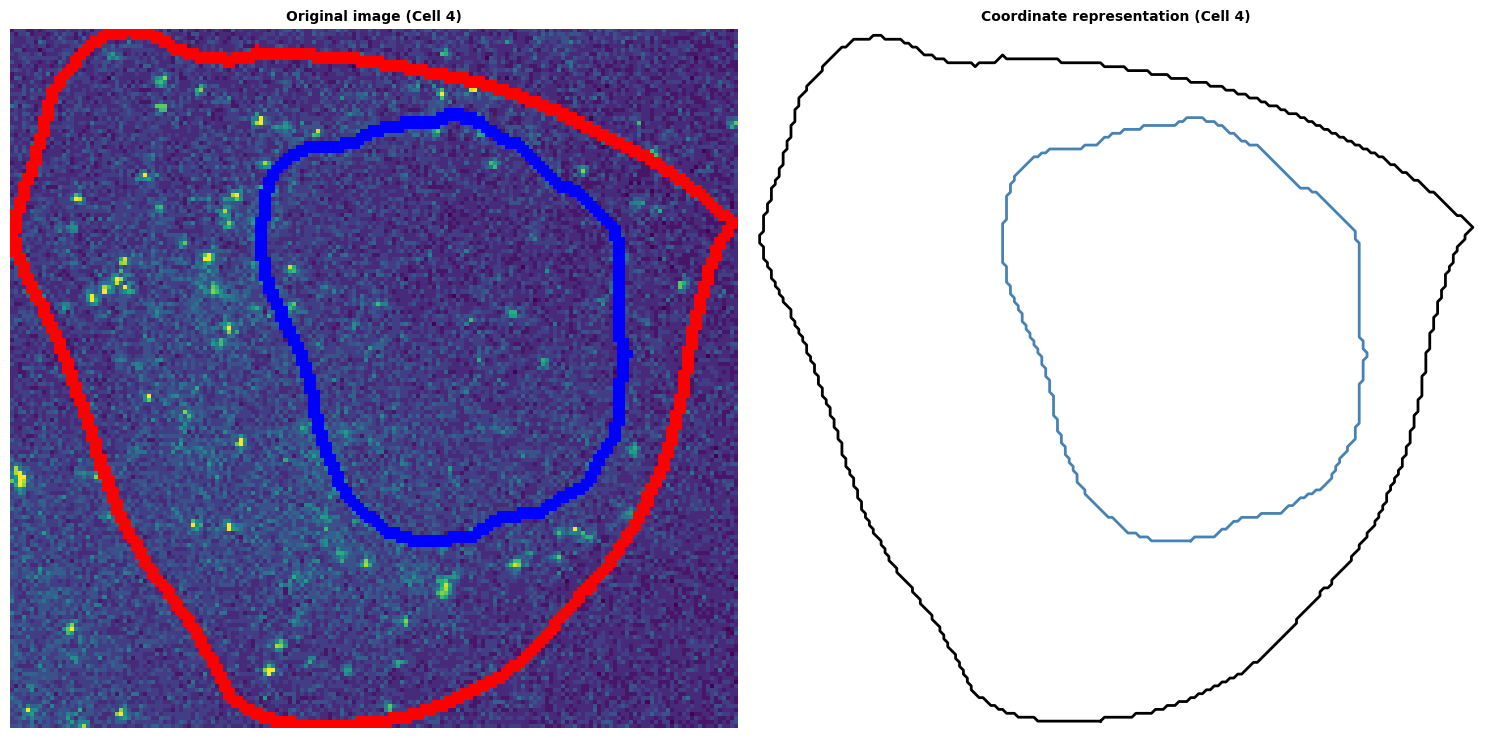

cell 5
 number of rna 0
 number of foci 0
 number of transcription sites 0


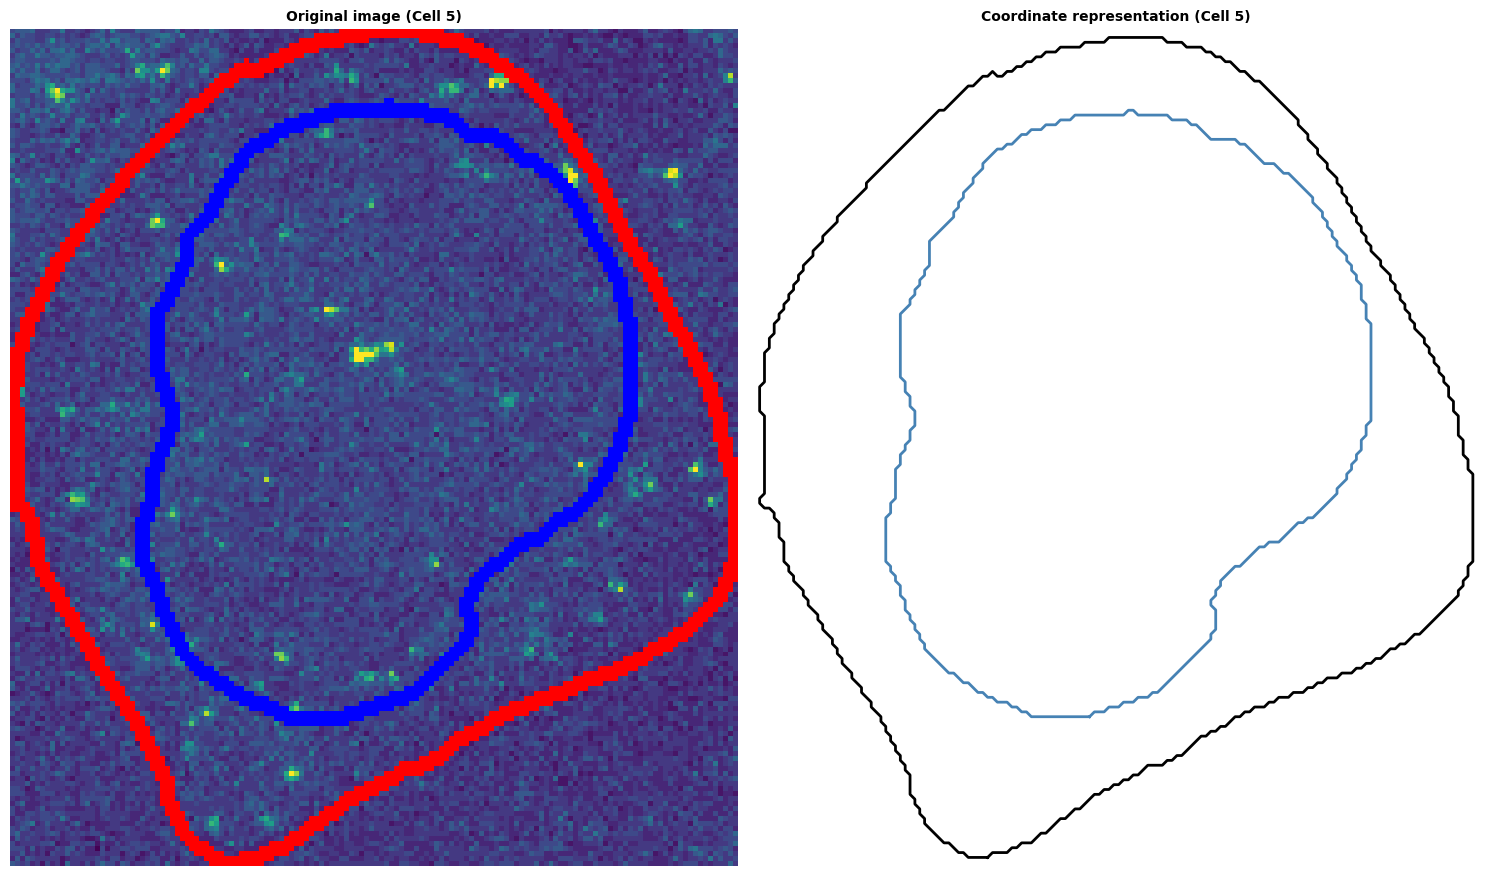

cell 6
 number of rna 0
 number of foci 0
 number of transcription sites 0


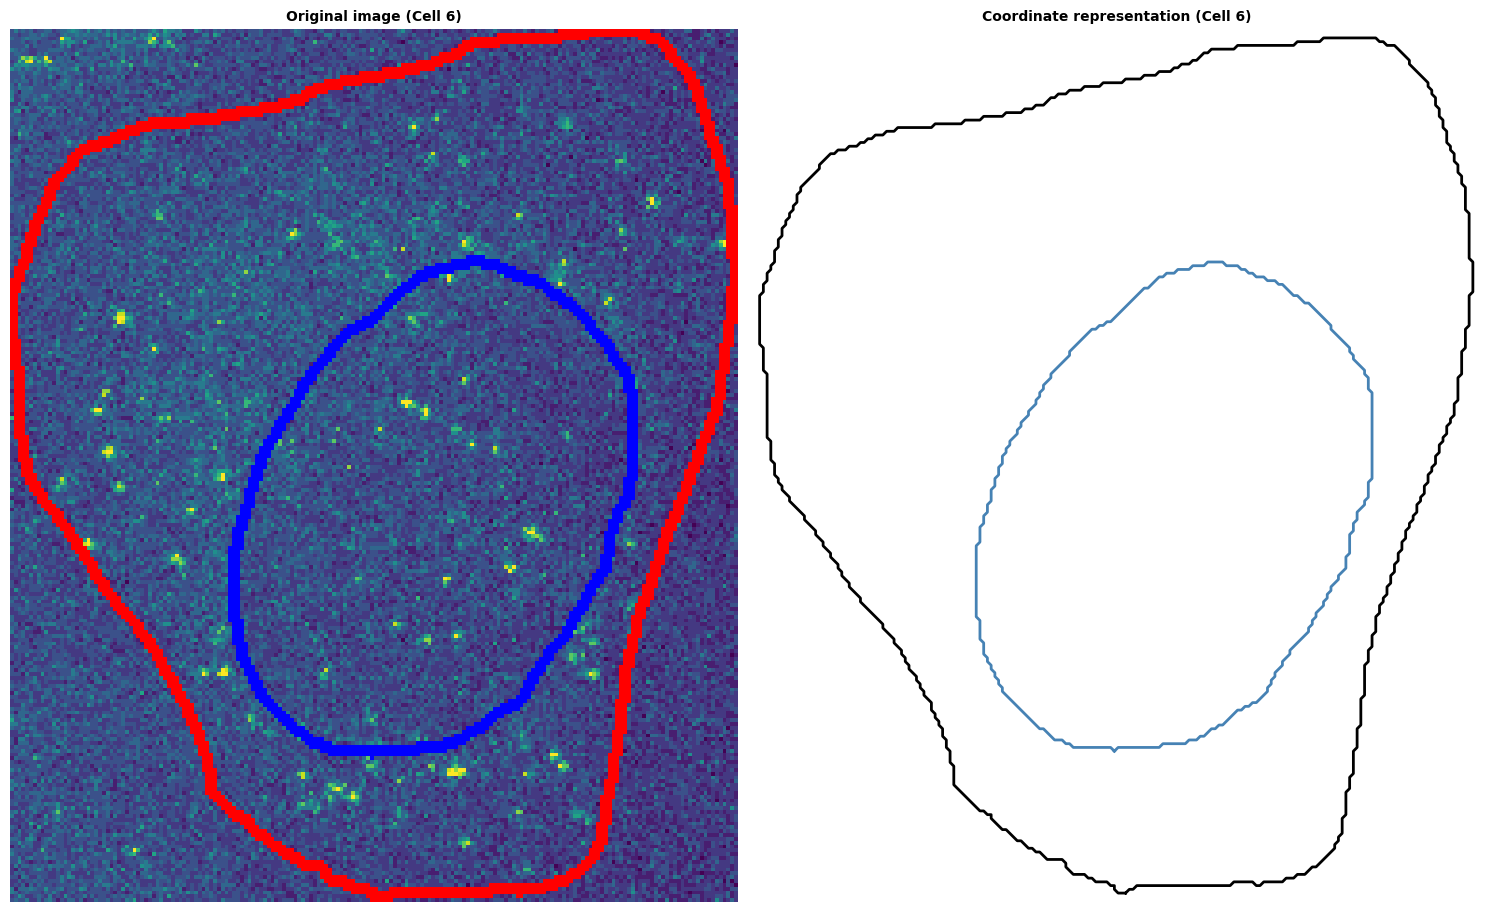

cell 7
 number of rna 0
 number of foci 0
 number of transcription sites 0


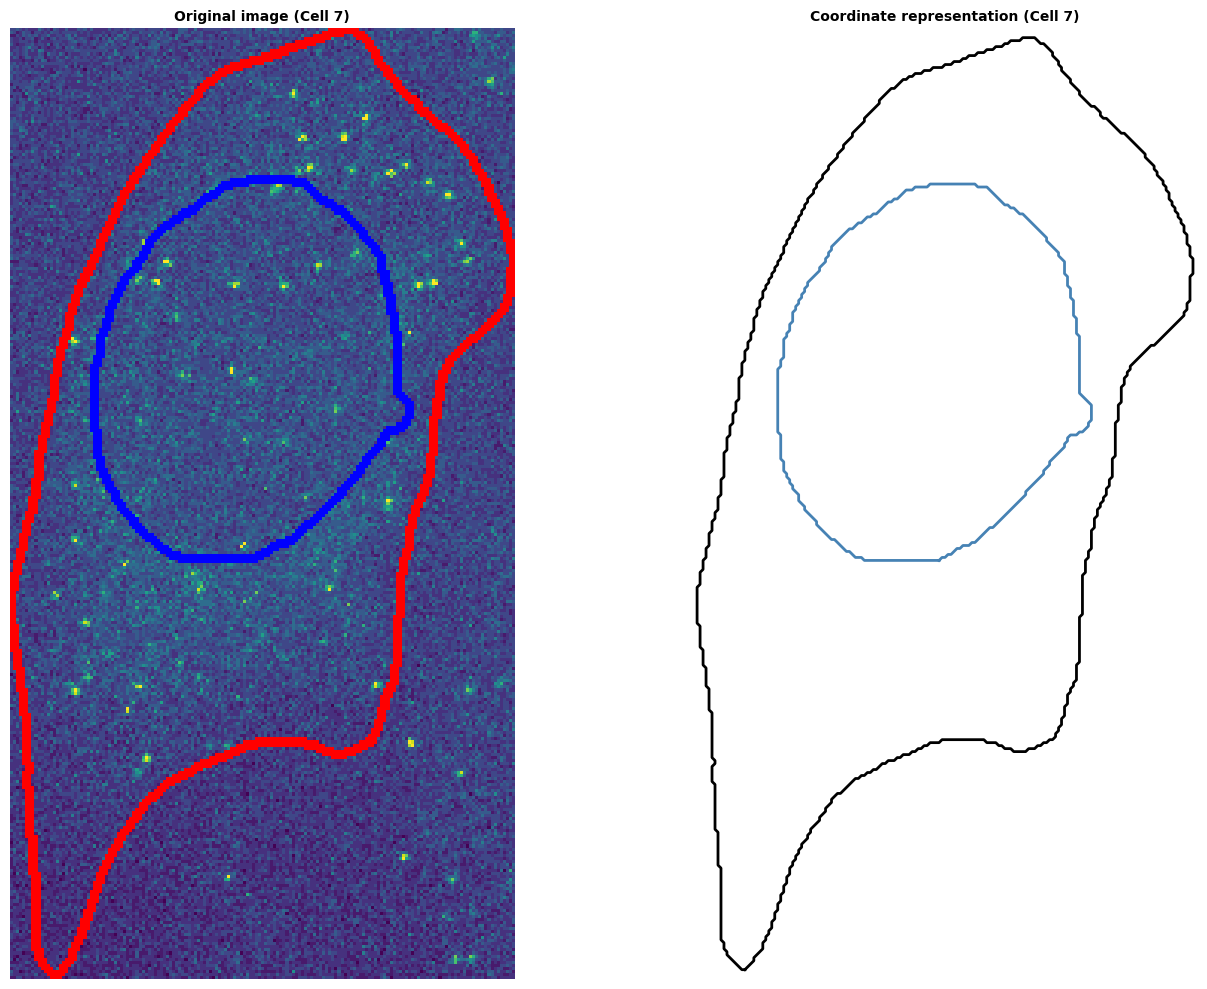

cell 8
 number of rna 0
 number of foci 0
 number of transcription sites 0


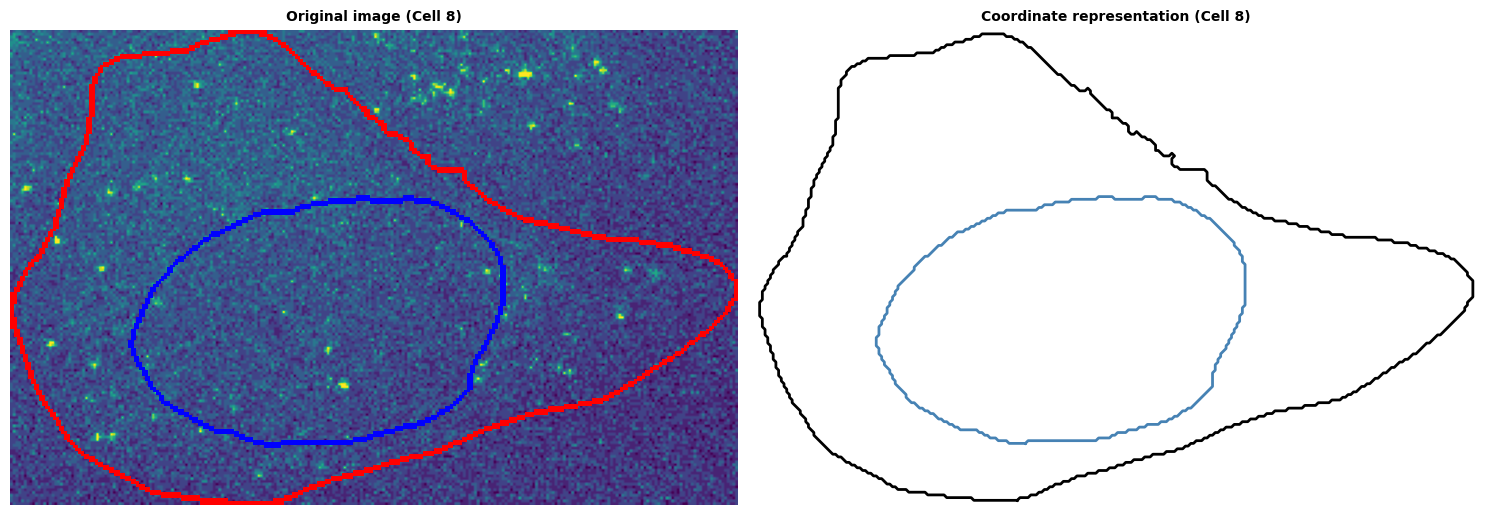

Overwriting individual_spotdetection_thresholds in DataContainer


{'bigfish_threshold': [17.18181818181818],
 'cellresults':    cell_id  cell_area  nuc_area  nb_rna  nb_rna_in_nuc  nb_rna_out_nuc  \
 0        2      27471      9143      40              5              35   
 1        3      22756      8380      43              2              41   
 2        4      22891      8316     114             38              76   
 3        5      22264      8859      50              8              42   
 4        6      22020      7481      69             11              58   
 5        7      16982      9142      62             21              41   
 6        9      31944     10092      60             17              43   
 7       10      29632      9842      68             23              45   
 8       11      27062      9450      21              5              16   
 0        2      27471      9143      40              5              35   
 1        3      22756      8380      43              2              41   
 2        4      22891      8316     114  

In [29]:
settings.verbose = True
settings.bigfish_threshold = 'mean'
BIGFISH_SpotDetection().run()

In [15]:
# DilationedCytoMask().run()

In [16]:
# DisplaySequentialParams().run()

In [17]:
# CellProperties().run()

In [18]:
# inst[-1].cell_properties.columns

In [19]:
# print(inst[-1].cell_properties['nuc_label'])
# print(inst[-1].cell_properties['cell_label'])
# print(inst[-1].cell_properties['cyto_label'])


In [20]:
# Display().displayMask(channel=1, label=5)

In [21]:
# Save_Parameters().run()